In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [192]:
df_iris = pd.read_csv(r'C:\Users\17097\Documents\Memorial University\CS 4304\datasets\iris.csv')
df_usedCars = pd.read_csv(r'C:\Users\17097\Documents\Memorial University\CS 4304\datasets\used_cars.csv')

In [3]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df_usedCars.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,Audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,Audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,Audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,Audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,Audi


## Question 1

Text(0.5, 1.0, 'Iris Petals')

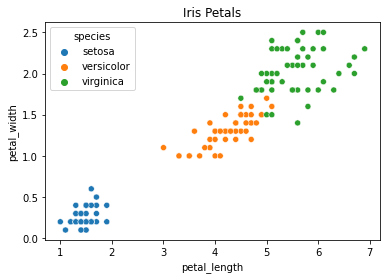

In [9]:
ax = sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df_iris, hue = 'species')

#ax.set_xlim(0, 7)
#ax.set_ylim(0, 2.5)
ax.set_title("Iris Petals")

## Question 2

Text(0.5, 1.0, 'Average Petal Area for Iris Flowers')

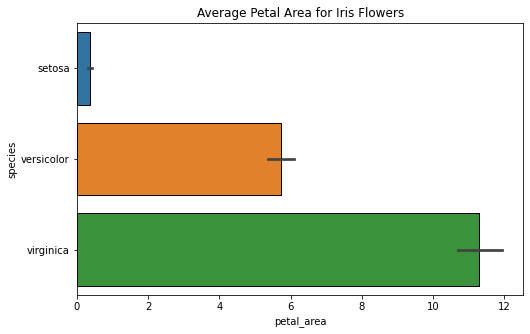

In [88]:
df_iris['petal_area'] = df_iris['petal_length'] * df_iris['petal_width']

df_iris[['species', 'petal_area']].groupby('species').mean().reset_index()

fig, ax = plt.subplots(figsize = (8,5))

sns.barplot(x='petal_area', y='species', data=df_iris, edgecolor = 'black', linewidth = 1)

ax.set_title("Average Petal Area for Iris Flowers")

## Question 3

In [96]:
df_usedCars = df_usedCars.sort_values(by = 'year', ascending = False)
df_q3 = df_usedCars[(df_usedCars.year >= 2005) & (df_usedCars.year <= 2019)]

In [97]:
data = [df_q3.price[df_q3.year == year] for year in df_q3.year.unique()]

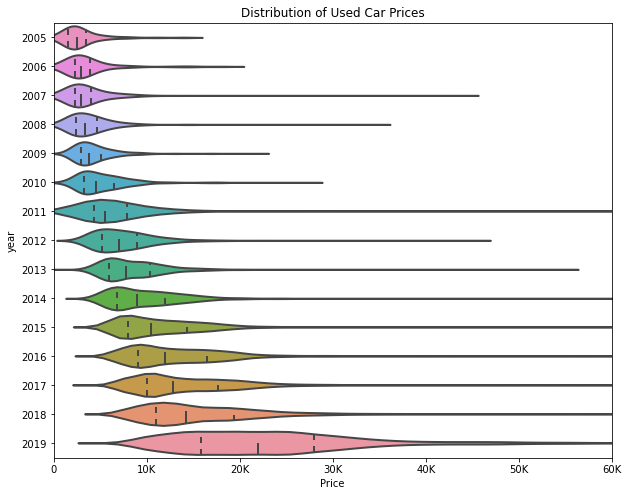

In [98]:
fig, ax = plt.subplots(figsize = (10,8))

sns.violinplot(data = data, edgecolor = 'black', linewidth = 2, inner = 'quartiles', scale = 'width', ax = ax, orient = 'h')

ax.set_yticks(range(0, len(df_q3.year.unique())))
ax.set_yticklabels(df_q3.year.unique())
ax.set_xlim(0, 60000)
ax.set_xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000])
ax.set_xticklabels(['0', '10K', '20K', '30K', '40K', '50K', '60K', '70K', '80K'])
ax.set_xlim(0, 60000)
ax.set_xlabel("Price")
ax.set_ylabel("year")
ax.set_title("Distribution of Used Car Prices")

ax.invert_yaxis()

## Question 4

In [197]:
df = df_usedCars[['year', 'price', 'transmission']]
df = df[((df.year >= 2000) & (df.year <= 2019)) & ((df.transmission == "Manual") | (df.transmission == "Automatic"))].reset_index()

In [202]:
df.sort_values(by = 'year', ascending = False)

,year,price,transmission
54997,2019,13359,Manual
16773,2019,15690,Manual
57764,2019,12398,Manual
57765,2019,12998,Manual
57766,2019,12998,Manual
...,...,...,...
28736,2000,1995,Manual
11398,2000,1699,Manual
33002,2000,1295,Automatic
39533,2000,11750,Automatic


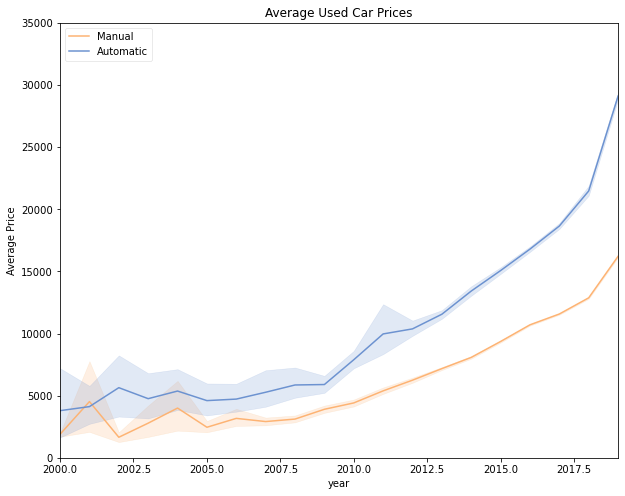

In [228]:
fig, ax = plt.subplots(figsize = (10,8))

sns.lineplot(x = 'year', y = 'price', data = df, hue = 'transmission', palette = ['#FDB373','#6C92D0'], ci = 95)

ax.set_ylim(0, 35000)
ax.set_xlim(2000, 2019)

ax.set_title("Average Used Car Prices")
ax.set_ylabel("Average Price")



ax.legend(loc = 'upper left')